### ライブラリインポート

In [1]:
import polars as pl
import numpy as np

import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

import pymc as pm
import arviz as az

## 9.1 例題: 種子数のポアソン回帰(個体差なし)

In [2]:
data = pl.read_parquet("../data/ch 09/d.parquet").to_pandas()
data.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
x,3.0,3.210526,3.421053,3.631579,3.842105,4.052632,4.263158,4.473684,4.684211,4.894737,5.105263,5.315789,5.526316,5.736842,5.947368,6.157895,6.368421,6.578947,6.789474,7.0
y,5.0,3.000000,6.000000,7.000000,7.000000,5.000000,9.000000,9.000000,7.000000,10.000000,12.000000,8.000000,7.000000,4.000000,4.000000,11.000000,9.000000,9.000000,8.000000,6.0


## 9.2 GLMのベイズモデル化

## 9.3 無情報事前分布

## 9.4 ベイズ統計モデルの事後分布の推定

### 9.4.1 ベイズ統計モデルのコーディング

#### 確率モデル定義

In [3]:
model1 = pm.Model()

with model1:
    # 観測値の定数化
    X_data = pm.ConstantData('X_data', data["x"].to_numpy())
    Y_data = pm.ConstantData('Y_data', data["y"].to_numpy())

    # リンク関数の係数
    beta1 = pm.Normal('beta1', mu = 0.0, sigma = 10.0)
    beta2 = pm.Normal('beta2', mu = 0.0, sigma = 10.0)

    # ポアソン分布のパラメータ
    mu = pm.Deterministic("mu", beta1 + beta2 * X_data)

    # 観測値の確率変数
    obs = pm.Poisson("poisson", mu = mu, observed = Y_data)

#### 確率モデル構造可視化

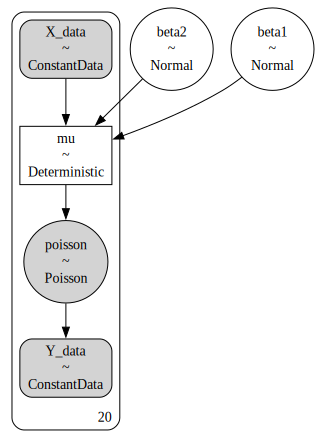

In [4]:
g = pm.model_to_graphviz(model1)
display(g)

#### サンプリング

In [5]:
with model1:
    idata1 = pm.sample(random_seed = 42)# , chains = 5, tune = 5, draws = 5

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta1, beta2]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


#### plot_trace 関数呼び出し

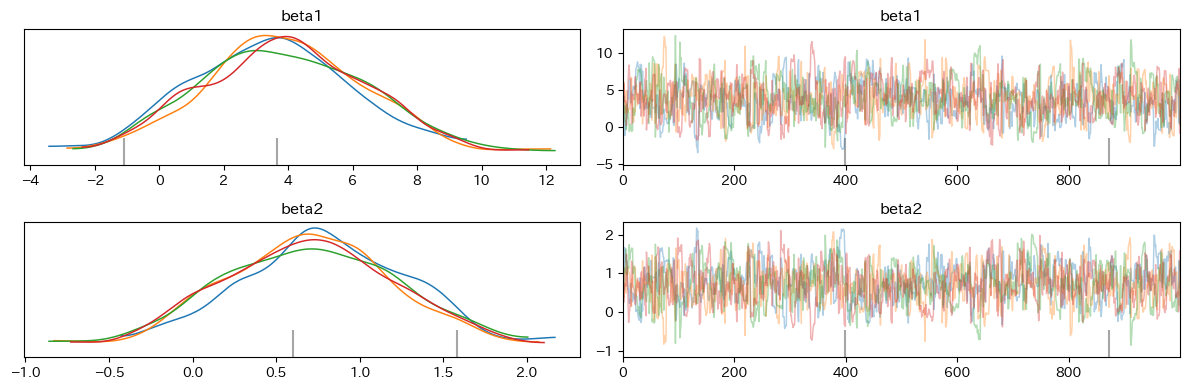

In [6]:
az.plot_trace(idata1, compact = False, var_names = ['beta1', 'beta2'])
plt.tight_layout()

#### plot_posteror関数呼び出し

Text(0.5, 1.0, '図9.5に対応 ベイズ推論結果')

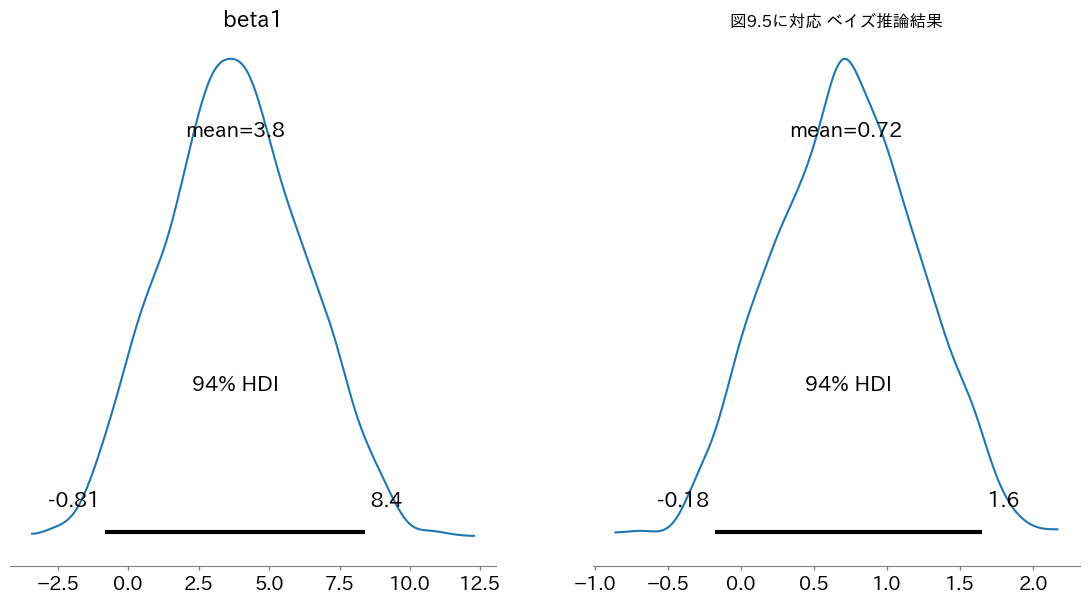

In [7]:
plt.rcParams['figure.figsize'] = (6, 6)
az.plot_posterior(idata1, var_names=['beta1', 'beta2'])
plt.title("図9.5に対応 ベイズ推論結果")

#### summary関数呼び出し

In [8]:
summary1 = az.summary(idata1)
display(summary1.head())

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta1,3.793,2.505,-0.810,8.416,0.101,0.071,616.0,840.0,1.0
beta2,0.719,0.502,-0.176,1.648,0.020,0.014,625.0,894.0,1.0
mu[0],5.951,1.100,3.856,7.940,0.041,0.029,706.0,1120.0,1.0
mu[1],6.102,1.013,4.263,8.012,0.037,0.026,737.0,1148.0,1.0
mu[2],6.253,0.929,4.500,7.948,0.033,0.024,781.0,1234.0,1.0


#### 個別のサンプルにおける回帰直線予測値の計算

In [9]:
### 事後予測サンプリングの実行
with model1:
    idata1.extend(pm.sample_posterior_predictive(idata1, random_seed = 1234))

Sampling: [poisson]


#### 散布図と回帰直線の重ね描き

<Axes: xlabel='poisson'>

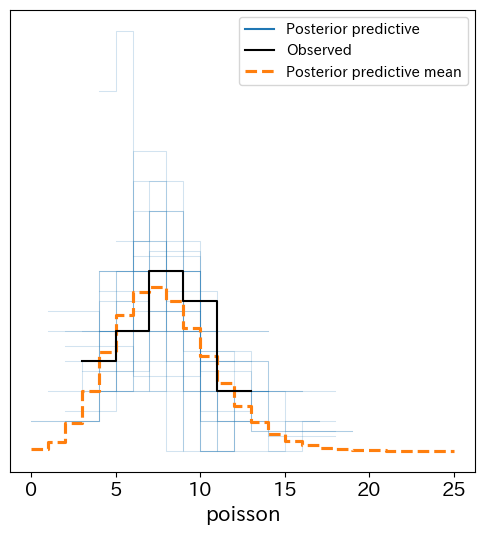

In [10]:
### 事後予測プロットの描画
pm.plot_ppc(idata1, num_pp_samples = 25, random_seed = 123)

<Axes: xlabel='x', ylabel='y'>

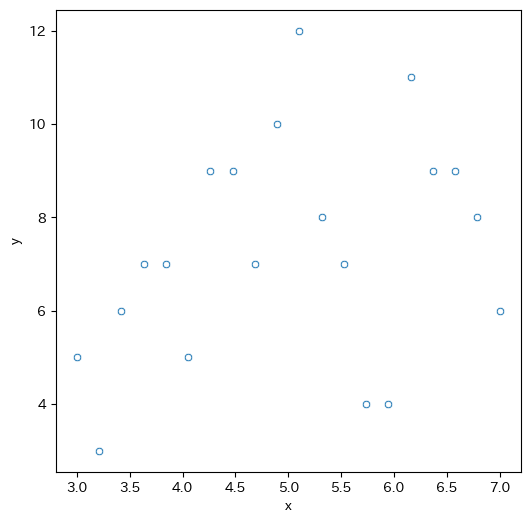

In [11]:
sns.scatterplot(data = data, x = "x", y = "y", marker = "$\circ$")

### 9.4.2 事後分布推定の準備

### 9.4.3 どれだけ長くMCMCサンプリングすればいいのか?

## 9.5 MCMCサンプルから事後分布を推定

### 9.5.1 事後分布の統計量

## 9.6 複数パラメータのMCMCサンプリング

### 9.6.1 ギブスサンプリング: この章の例題の場合

### 9.6.2 WinBUGSの挙動はどうなっている?

## この章のまとめと参考文献
